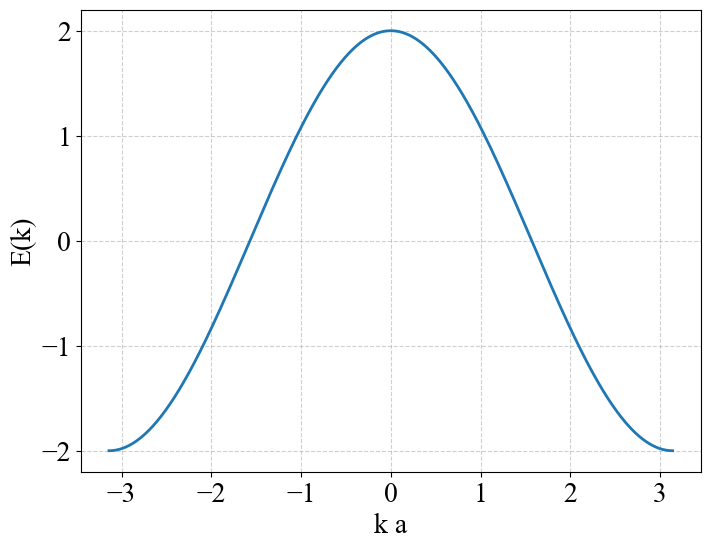

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# --- Setup and Definitions ---


# This configures the font for the entire plot.
plt.rcParams.update({
    'font.family': 'Times New Roman',
    'font.size': 20,
    'axes.labelcolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'axes.edgecolor': 'black'
})


a = 1.0
t = 1.0

# --- Data Generation ---

# Create the data for the x-axis.
# We want to plot against "k a", so we create a range for k*a from -pi to pi.
# np.linspace creates an array of 500 evenly spaced points for a smooth curve.
ka = np.linspace(-np.pi, np.pi, 500)

# Calculate the function E(k) = 2*t*Cos(k*a)
E_k = 2 * t * np.cos(ka)

# --- Plotting ---

# Create a figure and an axes object to plot on
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the function E(k) versus k*a
ax.plot(ka, E_k, linewidth=2)

# Set the labels for the x and y axes (equivalent to FrameLabel)
ax.set_xlabel("k a")
ax.set_ylabel("E(k)")

# Add a grid for better readability
ax.grid(True, linestyle='--', alpha=0.6)

# Display the final plot
plt.show()

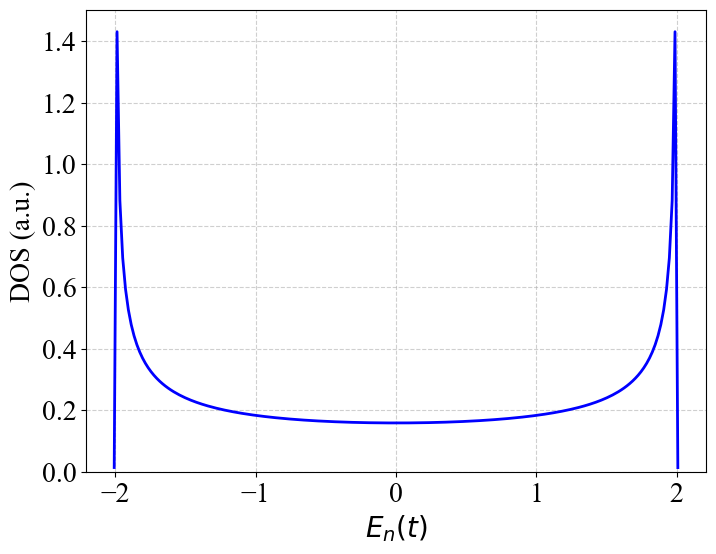

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Setup and Definitions ---

# This configures the font and colors for the plot elements.
plt.rcParams.update({
    'font.family': 'Times New Roman',
    'font.size': 20,
    'axes.labelcolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'axes.edgecolor': 'black'
})

# Define the constants (assuming a=1 and t=1 as they are not defined)
a = 1.0
t = 1.0

# --- Data Generation ---

# Generate the sequence of k values from -Pi/a to Pi/a with a step of 0.001
k = np.arange(-np.pi / a, np.pi / a, 0.001)

# Calculate the list of eigenvalues, E(k) = 2*t*Cos(k*a)
eigenvals = 2 * t * np.cos(k * a)

# The Flatten[EIGENVALS] command is not needed, as the NumPy calculation
# already produces a flat, one-dimensional array.

# --- Plotting ---

# Create a figure and an axes object
fig, ax = plt.subplots(figsize=(8, 6))

# Create the smooth histogram (Kernel Density Estimate plot)
# This is the Python equivalent of SmoothHistogram.
# A smaller value creates a more detailed, less smooth curve.
sns.kdeplot(eigenvals, ax=ax, linewidth=2, color='blue', bw_adjust=0.01)

# Set the labels for the x and y axes, using LaTeX for the subscript
# This corresponds to the FrameLabel argument.
ax.set_xlabel('$E_n(t)$')
ax.set_ylabel('DOS (a.u.)')

# Add a grid for clarity
ax.grid(True, linestyle='--', alpha=0.6)

# Display the final plot
plt.show()

In [4]:
import numpy as np

# --- Setup and Definitions ---

# Define the model parameters
L = 500      # Number of sites in the chain
ep = 0.0     # On-site energy (diagonal elements)
t = 1.0      # Hopping energy (off-diagonal for nearest neighbors)


a = 1.0      # Lattice constant (distance between sites)
tol = 0.01

# --- Hamiltonian Construction ---

# 1. Start with a matrix of zeros
H = np.zeros((L, L))

# 2. Set the diagonal elements to the on-site energy 'ep'
# The 'fill_diagonal' function modifies the array in-place.
np.fill_diagonal(H, ep)

# 3. Set the nearest-neighbor hopping energy 't' for the off-diagonals.
# This sets the elements H[i, i+1] and H[i+1, i] to 't'.
# np.arange(L-1) creates indices [0, 1, ..., L-2].
indices = np.arange(L - 1)
H[indices, indices + 1] = t  # Upper off-diagonal
H[indices + 1, indices] = t  # Lower off-diagonal


# --- (Optional) Print the top-left corner of the matrix to verify ---
# For L=500, printing the whole matrix isn't practical.
print("Hamiltonian matrix H (top-left 5x5 corner):")
print(H[0:5, 0:5])

Hamiltonian matrix H (top-left 5x5 corner):
[[0. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0.]
 [0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 1.]
 [0. 0. 0. 1. 0.]]


In [11]:
import numpy as np

# Define parameters
L = 500
ep = 0.0
t = 1.0

# Build the Hamiltonian in one line by adding the diagonal and off-diagonals
H_alternative = (np.diag(np.full(L, ep)) +
                 np.diag(np.full(L - 1, t), k=1) +
                 np.diag(np.full(L - 1, t), k=-1))

# print("Alternative H (top-left 5x5 corner):")
# print(H_alternative[0:5, 0:5])

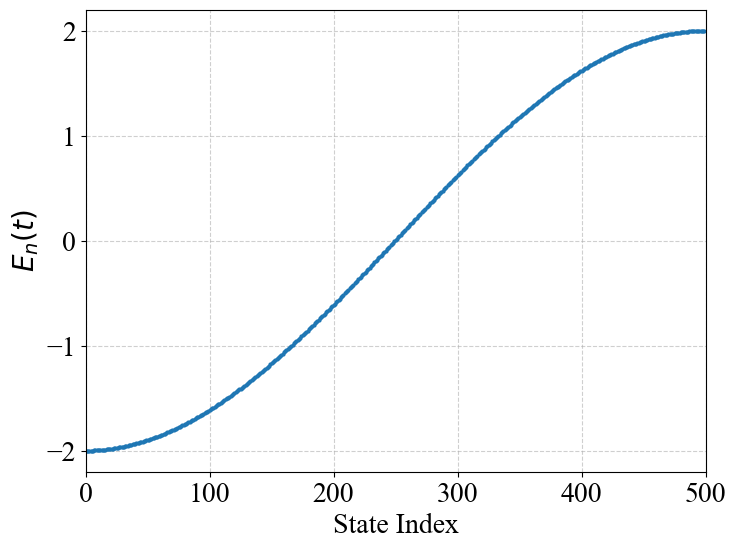

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Construct the Hamiltonian (from the previous step) ---

# Define the model parameters
L = 500      # Number of sites in the chain
ep = 0.0     # On-site energy (diagonal elements)
t = 1.0      # Hopping energy (off-diagonal for nearest neighbors)

# Create the Hamiltonian matrix H
# Start with a matrix of zeros and add the diagonal and off-diagonal elements.
H = (np.diag(np.full(L, ep)) +
     np.diag(np.full(L - 1, t), k=1) +
     np.diag(np.full(L - 1, t), k=-1))


# --- 2. Calculate and Plot the Eigenvalues (new part) ---

# Calculate the eigenvalues of the matrix H.
# np.linalg.eigvalsh is a specialized, fast function for real symmetric
# matrices (like our H) and conveniently returns the eigenvalues already sorted.
eigenvalues = np.linalg.eigvalsh(H)

# --- Plotting ---
 
plt.rcParams.update({
    'font.family': 'Times New Roman',
    'font.size': 20,
    'axes.labelcolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'axes.edgecolor': 'black'
})

# Create a figure and an axes object
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the sorted eigenvalues.
# ax.plot() with a single list of values automatically plots them
# against their index (0, 1, 2, ...), which is what ListPlot does.
ax.plot(eigenvalues, marker='o', linestyle='None', markersize=2)

# Set the labels for the x and y axes, using LaTeX for the subscript
ax.set_xlabel("State Index")
ax.set_ylabel("$E_n(t)$")

# Add a grid and set axis limits
ax.grid(True, linestyle='--', alpha=0.6)
ax.set_xlim(0, L) # Set x-axis to go from 0 to L

# Display the final plot
plt.show()

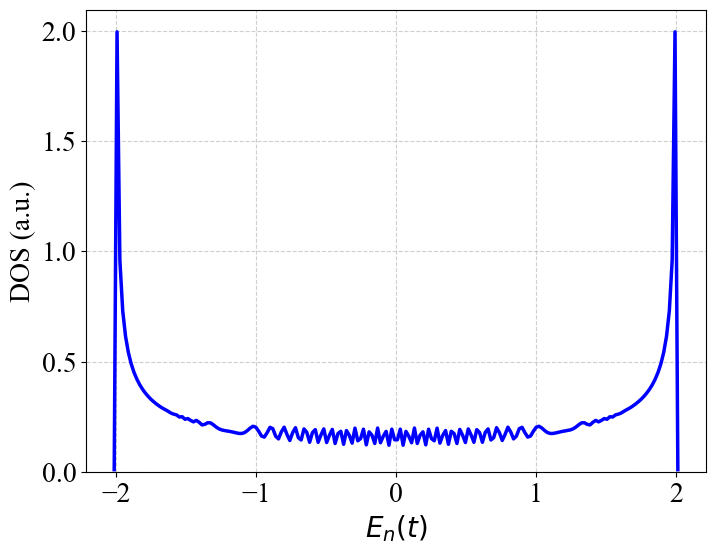

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Construct the Hamiltonian ---

# Define the model parameters
L = 500      # Number of sites in the chain
ep = 0.0     # On-site energy
t = 1.0      # Hopping energy

# Build the tridiagonal Hamiltonian matrix H
H = (np.diag(np.full(L, ep)) +
     np.diag(np.full(L - 1, t), k=1) +
     np.diag(np.full(L - 1, t), k=-1))


# --- 2. Calculate the Eigenvalues ---

# Calculate the eigenvalues of H.
# eigvalsh is fast, efficient, and returns sorted eigenvalues.
eigenvalues = np.linalg.eigvalsh(H)


# --- 3. Plot the Smooth Histogram (Density of States) ---

# Set the plot style
plt.rcParams.update({
    'font.family': 'Times New Roman',
    'font.size': 20,
    'axes.labelcolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'axes.edgecolor': 'black'
})

# Create a figure and an axes object
fig, ax = plt.subplots(figsize=(8, 6))

# Create the smooth histogram (Kernel Density Estimate plot)
# This is the Python equivalent of SmoothHistogram and represents the DOS.
sns.kdeplot(eigenvalues, ax=ax, linewidth=2.5, color='blue', bw_adjust=0.01)

# Set the labels for the x and y axes, using LaTeX for the subscript
ax.set_xlabel('$E_n(t)$')
ax.set_ylabel('DOS (a.u.)')

# Add a grid for clarity
ax.grid(True, linestyle='--', alpha=0.6)

# Display the final plot
plt.show()

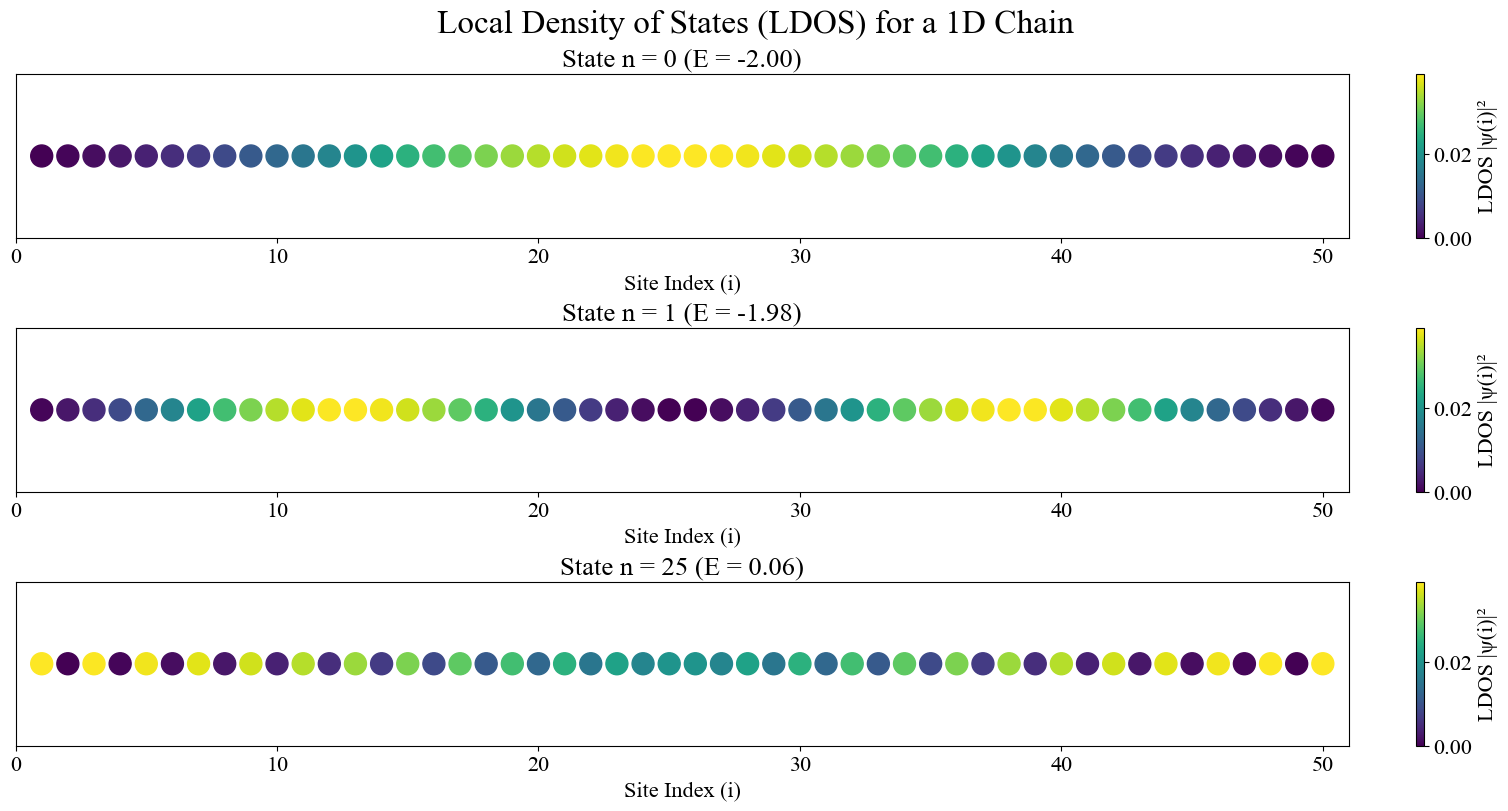

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Setup and Hamiltonian Construction ---

# Define the model parameters
L = 50   # Reduced L for better visualization of individual disks
ep = 0.0 # On-site energy
t = 1.0  # Hopping energy

# Build the tridiagonal Hamiltonian matrix H
H = (np.diag(np.full(L, ep)) +
     np.diag(np.full(L - 1, t), k=1) +
     np.diag(np.full(L - 1, t), k=-1))

# Generate the real-space coordinates for plotting
# coords is an (L, 2) array where each row is [x, y]
coords = np.array([[i, 0.5] for i in range(1, L + 1) ])


# --- 2. Solve the Full Eigenproblem ---

# Calculate the eigenvalues (energies) and eigenvectors (wavefunctions)
# np.linalg.eigh is perfect for this, as H is a real symmetric matrix.
# It returns sorted eigenvalues and the corresponding eigenvectors as columns.
eigenvalues, eigenvectors = np.linalg.eigh(H)


# --- 3. Function to Calculate and Plot LDOS ---

def calculate_and_plot_ldos(state_index, ax):
    """
    Calculates the LDOS for a given state and plots it on a given axis.
    Handles potential degeneracies by summing contributions.
    """
    # Get the energy of the chosen state
    target_energy = eigenvalues[state_index]

    # Find all states with nearly the same energy to handle degeneracy
    # This is crucial for more complex models. For this simple 1D chain,
    # states are non-degenerate, but this is a robust approach.
    degenerate_indices = np.where(np.isclose(eigenvalues, target_energy))[0]
    
    # The corresponding eigenvectors (columns of the matrix)
    degenerate_evecs = eigenvectors[:, degenerate_indices]
    
    # The LDOS is the sum of the squared magnitudes of the wavefunctions
    # for all degenerate states. We sum along axis=1 to combine contributions
    # from different degenerate states for each site.
    ldos = np.sum(np.abs(degenerate_evecs)**2, axis=1)

    # --- Plotting ---
    # Use a scatter plot to represent sites as disks.
    # The color 'c' is mapped to the ldos values.
    # The colormap 'viridis' provides a clear color scale.
    # The alpha of the colormap is varied automatically based on the value.
    scatter = ax.scatter(
        coords[:, 0],
        coords[:, 1],
        c=ldos,
        s=250,  # Size of the disks
        cmap='viridis', # Colormap (can also use 'plasma', 'inferno', etc.)
        vmin=0 # Ensure color scale starts at zero
    )
    
    # Add a colorbar to the plot to show the LDOS scale
    plt.colorbar(scatter, ax=ax, label="LDOS |ψ(i)|²")
    
    # --- Styling ---
    ax.set_title(f"State n = {state_index} (E = {target_energy:.2f})")
    ax.set_xlabel("Site Index (i)")
    ax.set_yticks([]) # Hide the y-axis ticks
    ax.set_xlim(0, L + 1)
    ax.set_ylim(0, 1)
    ax.grid(False)


# --- 4. Create Plots for Different States ---

# Set the global plot style
plt.rcParams.update({
    'font.family': 'Times New Roman',
    'font.size': 16
})

# Create a figure with multiple subplots to compare states
fig, axes = plt.subplots(3, 1, figsize=(15, 8), constrained_layout=True)
fig.suptitle("Local Density of States (LDOS) for a 1D Chain", fontsize=24)

# Plot the Ground State (n=0)
calculate_and_plot_ldos(0, axes[0])

# Plot a low-energy excited state (n=1)
calculate_and_plot_ldos(1, axes[1])

# Plot a state near the middle of the energy band
calculate_and_plot_ldos(L // 2, axes[2])

plt.show()

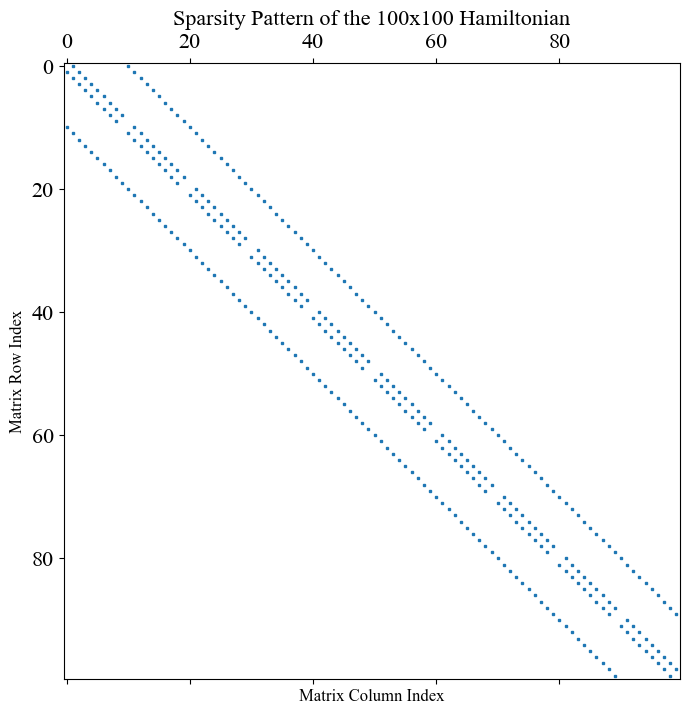

Top-left 12x12 corner of the Hamiltonian H:
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Setup and Definitions ---

# Define the dimensions of the square grid
Lx = 10  # Number of sites in the x-direction
Ly = 10  # Number of sites in the y-direction
N = Lx * Ly  # Total number of sites

# Define the tight-binding parameters
ep = 0.0  # On-site energy
t = 1.0   # Hopping energy

# --- 2. Construct the Hamiltonian ---

# Initialize an N x N zero matrix
H = np.zeros((N, N))

# Loop through each site of the grid
for iy in range(Ly):
    for ix in range(Lx):
        # Map the 2D coordinate (ix, iy) to the 1D matrix index 'i'
        i = ix + iy * Lx
        
        # Set the on-site energy for the diagonal element H[i, i]
        H[i, i] = ep
        
        # --- Add hopping terms for nearest neighbors ---
        
        # Neighbor to the right
        if ix + 1 < Lx:
            j = (ix + 1) + iy * Lx
            H[i, j] = t
            H[j, i] = t # The matrix is symmetric
            
        # Neighbor above
        if iy + 1 < Ly:
            j = ix + (iy + 1) * Lx
            H[i, j] = t
            H[j, i] = t # The matrix is symmetric

# --- 3. Visualize the Hamiltonian Matrix ---
# A 'spy' plot shows the non-zero elements of a matrix, revealing its structure.

fig, ax = plt.subplots(figsize=(8, 8))
ax.spy(H, markersize=2)
ax.set_title(f"Sparsity Pattern of the {N}x{N} Hamiltonian", fontsize=16)
ax.set_xlabel("Matrix Column Index", fontsize=12)
ax.set_ylabel("Matrix Row Index", fontsize=12)
plt.show()

# Print the top-left 12x12 corner to see the structure numerically
print("Top-left 12x12 corner of the Hamiltonian H:")
print(np.round(H[0:12, 0:12], 1))

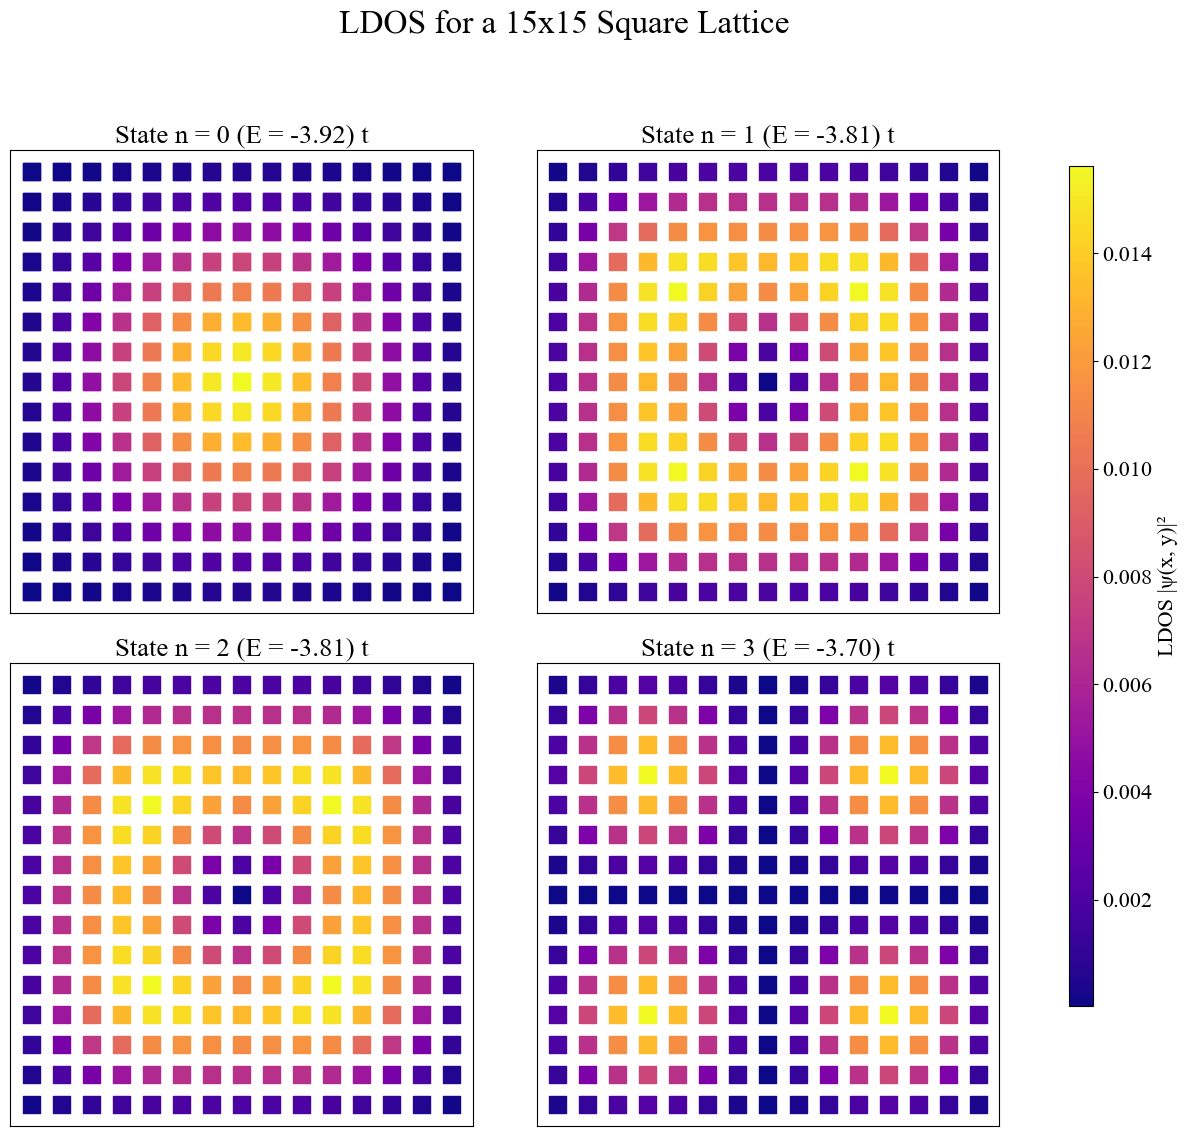

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Setup and 2D Hamiltonian Construction ---

# Define the dimensions of the square grid
Lx = 15  # Number of sites in the x-direction
Ly = 15  # Number of sites in the y-direction
N = Lx * Ly  # Total number of sites

# Define the tight-binding parameters
ep = 0.0  # On-site energy
t = 1.0   # Hopping energy

# Initialize an N x N zero matrix for the Hamiltonian
H = np.zeros((N, N))

# Generate the real-space coordinates for plotting
# coords is an (N, 2) array where each row is [ix, iy]
coords = np.array([[ix, iy] for iy in range(Ly) for ix in range(Lx)])

# Loop through each site of the grid to build H
for iy in range(Ly):
    for ix in range(Lx):
        i = ix + iy * Lx  # Map (ix, iy) to 1D index i
        H[i, i] = ep      # Set on-site energy

        # Hopping to the right neighbor
        if ix + 1 < Lx:
            j = (ix + 1) + iy * Lx
            H[i, j] = H[j, i] = t

        # Hopping to the neighbor above
        if iy + 1 < Ly:
            j = ix + (iy + 1) * Lx
            H[i, j] = H[j, i] = t

# --- 2. Solve the Full Eigenproblem ---

# Calculate eigenvalues (energies) and eigenvectors (wavefunctions)
eigenvalues, eigenvectors = np.linalg.eigh(H)

# --- 3. Function to Calculate and Plot 2D LDOS ---

def calculate_and_plot_ldos_2d(state_index, ax):
    """Calculates and plots the 2D LDOS for a given state."""
    target_energy = eigenvalues[state_index]
    
    # This robustly handles any potential energy degeneracies
    degenerate_indices = np.where(np.isclose(eigenvalues, target_energy))[0]
    degenerate_evecs = eigenvectors[:, degenerate_indices]
    ldos = np.sum(np.abs(degenerate_evecs)**2, axis=1)

    # --- Plotting ---
    # The scatter plot uses the 2D coordinates
    # The marker is a square 's' to better tile the grid
    scatter = ax.scatter(
        coords[:, 0],  # x-coordinates
        coords[:, 1],  # y-coordinates
        c=ldos,
        s=150,         # Adjust marker size as needed
        cmap='plasma',
        marker='s'
    )
    
    # --- Styling ---
    ax.set_title(f"State n = {state_index} (E = {target_energy:.2f}) t")
    ax.set_aspect('equal', adjustable='box') # Ensure the grid is square
    ax.set_xticks([])
    ax.set_yticks([])
    return scatter

# --- 4. Create Plots for Different States ---

plt.rcParams.update({'font.family': 'Times New Roman', 'font.size': 16})

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle(f"LDOS for a {Lx}x{Ly} Square Lattice", fontsize=24)

# Plot the four lowest energy states
calculate_and_plot_ldos_2d(0, axes[0, 0])
calculate_and_plot_ldos_2d(1, axes[0, 1])
calculate_and_plot_ldos_2d(2, axes[1, 0])
calculate_and_plot_ldos_2d(3, axes[1, 1])


# Adjust layout and add a single colorbar for all plots
fig.tight_layout(rect=[0, 0.03, 0.9, 0.95])
# Create a new axis for the colorbar to avoid shrinking a subplot
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
# We need to get the scatter object from one of the plots to create the colorbar
# Let's re-run the first plot to grab its scatter object for the colorbar
scatter_for_cbar = calculate_and_plot_ldos_2d(0, axes[0, 0])
fig.colorbar(scatter_for_cbar, cax=cbar_ax, label="LDOS |ψ(x, y)|²")

plt.show()